# Linked Data con Python

Usaremos:

* gastrodon: Toolkit to display, analyze, and visualize data and documents based on RDF graphs and the SPARQL query language using Pandas, Jupyter, and other Python ecosystem tools. https://github.com/paulhoule/gastrodon
* sys
* pandas 

<div class="alert alert-warning" role="alert" style="margin: 10px">
Para instalar la librería:<br>
jovyan@9778f76bfaea:~$ /opt/conda/bin/pip install gastrodon
</div>

## Cargamos el entorno

In [1]:
import sys
from gastrodon import RemoteEndpoint,QName,ttl,URIRef,inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from IPython.display import display, HTML
pd.options.display.width=120
pd.options.display.max_colwidth=100

Definimos los prefijos que de los "namespace" a utilizar

In [6]:
prefixes=inline("""
    @prefix : <http://dbpedia.org/resource/> .
    @prefix dbo: <http://dbpedia.org/ontology/> .
    @prefix dbp: <http://dbpedia.org/property/> .
    @prefix foaf: <http://xmlns.com/foaf/0.1/> .
""").graph

In [7]:
prefixes

<Graph identifier=Nc56246a8035e4ea989d693b661189f4a (<class 'rdflib.graph.Graph'>)>

Y el endpoint sobre el que vamos a hacer las consultas. En este caso, dbpedia.

In [9]:
endpoint=RemoteEndpoint(
    "http://dbpedia.org/sparql/"
    ,default_graph="http://dbpedia.org"
    ,prefixes=prefixes
    ,base_uri="http://dbpedia.org/resource/"
)

## Tripletas en DBpedia

Con una consulta simple, podemos contar el número de tripletas

In [10]:
count=endpoint.select("""
    SELECT (COUNT(*) AS ?count) { ?s ?p ?o .}
""").at[0,"count"]
count

#hay millones de relaciones entre sujeto objeto y predicado en dbpedia

1141462733

## Número de predicados

Para la siguiente consulta, hacemos una lista de predicados comunes. El número de respuestas en el endpoint de DBPEDIA está limitado a 10000.

Each predicate is a relationship between a topic and either another topic or a literal value.  For instance,  the **rdf:type** predicate links a topic to another topic representing a class that the first topic is an instance,  for instance:

```
<Alan_Alda> rdf:type on:Person .
```

**rdfs:label**,  on the other hand,  links topics to literal values,  such as

```
<Alan_Alda> rdfs:label 
                "Alan Alda"@en,
                "アラン・アルダ"@ja . 
```

Strings in RDF (like the one above) are unusual compared to other computer languages because they can contain language tags,  a particularly helpful feature for multilingual databases such as DBpedia.

In [11]:
predicates=endpoint.select("""
    SELECT ?p (COUNT(*) AS ?count) { ?s ?p ?o .} GROUP BY ?p ORDER BY DESC(?count)
""")
predicates

,count
p,
dbo:wikiPageWikiLink,254069466
rdf:type,146346566
owl:sameAs,98962903
rdfs:label,60428538
rdfs:comment,46587083
...,...
http://purl.org/dc/terms/title,1
http://purl.org/dc/terms/creator,1
dbp:party8name,1


Podemos enseñar solo los N primeros resultados

In [7]:
predicates.head(30)

,count
p,
dbo:wikiPageWikiLink,254069466
rdf:type,146346566
rdfs:label,60428538
rdfs:comment,46587083
http://purl.org/dc/terms/subject,35204244
dbo:wikiPageID,20617798
dbo:wikiPageRevisionID,20617797
http://purl.org/dc/elements/1.1/language,16750551
foaf:depiction,8717410


O los últimos

In [8]:
predicates.tail()

,count
p,
http://purl.org/dc/terms/description,1
http://purl.org/dc/terms/source,1
owl:versionInfo,1
http://purl.org/dc/terms/title,1
http://purl.org/dc/terms/creator,1


## Visualización de resultados

**dbo:Image** Algunos resultados de dbpedia son links a imagenes, que gracias a Jupyter, podemos visualizarlos

In [12]:
endpoint.select("""
    SELECT (COUNT(*) AS ?count)
    { SELECT DISTINCT ?type { ?s a ?type .} }
""")

,count
0,483639


In [13]:
types=endpoint.select("""
    SELECT ?type (COUNT(*) AS ?count)
    { ?s a ?type .} 
    GROUP BY ?type ORDER BY DESC(?count)
""")
types[types.index.str.startswith('dbo:')]

,count
type,
dbo:Image,11894660
dbo:CareerStation,2687734
dbo:Person,2268103
dbo:TimePeriod,2213022
dbo:Eukaryote,1967953
...,...
dbo:BaseballSeason,271
dbo:Rower,265
dbo:AmericanLeader,263


In [14]:
pics = endpoint.select("""
    SELECT ?that { 
        ?that a dbo:Image
    } LIMIT 10
""")
pics

,that
0,"http://commons.wikimedia.org/wiki/Special:FilePath/19th_century_Janam_Sakhi,_Guru_Nanak_meets_Fi..."
1,"http://commons.wikimedia.org/wiki/Special:FilePath/19th_century_Janam_Sakhi,_Guru_Nanak_meets_Ka..."
2,"http://commons.wikimedia.org/wiki/Special:FilePath/19th_century_Janam_Sakhi,_Guru_Nanak_meets_Ka..."
3,"http://commons.wikimedia.org/wiki/Special:FilePath/19th_century_Janam_Sakhi,_Guru_Nanak_meets_Na..."
4,"http://commons.wikimedia.org/wiki/Special:FilePath/19th_century_Janam_Sakhi,_Guru_Nanak_meets_Na..."
5,"http://commons.wikimedia.org/wiki/Special:FilePath/19th_century_Janam_Sakhi,_Guru_Nanak_meets_Su..."
6,"http://commons.wikimedia.org/wiki/Special:FilePath/19th_century_Janam_Sakhi,_Guru_Nanak_meets_Su..."
7,"http://commons.wikimedia.org/wiki/Special:FilePath/19th_century_Janam_Sakhi,_Guru_Nanak_meets_th..."
8,"http://commons.wikimedia.org/wiki/Special:FilePath/19th_century_Janam_Sakhi,_Guru_Nanak_meets_th..."
9,"http://commons.wikimedia.org/wiki/Special:FilePath/19th_century_Janam_sakhi,_Lahore,_Guru_Nanak_..."


In [23]:
HTML('<img src="{0}">'.format(pics.at[0,'that']))

## Ejercicio 1

Muestra la imagen de un escritor/a vivo

In [28]:
escritores = endpoint.select("""
SELECT ?nombre ?foto
WHERE{
    ?autor a dbo:Writer .
    ?autor foaf:name ?nombre .
    ?autor dbo:birthDate ?fechaNac .
    ?autor foaf:depiction ?foto
    FILTER NOT EXISTS { ?autor dbo:deathDate ?death. }
} 
LIMIT 100



""")
escritores

,nombre,foto
0,Alister McGrath,http://commons.wikimedia.org/wiki/Special:FilePath/Alister_McGrath.jpg
1,Alka Saraogi,http://commons.wikimedia.org/wiki/Special:FilePath/Alka_Saraogi.jpg
2,Allen Barnett,http://commons.wikimedia.org/wiki/Special:FilePath/ALLENBARNETT_(cropped).jpg
3,Allen Klein,http://commons.wikimedia.org/wiki/Special:FilePath/Allen-Klein-author-in-2015.jpg
4,Allen Kurzweil,http://commons.wikimedia.org/wiki/Special:FilePath/Allen_Kurzweil_Wiki2007.jpg
...,...,...
95,Andreas Eschbach,http://commons.wikimedia.org/wiki/Special:FilePath/MK30243_Andreas_Eschbach.jpg
96,Andreas Horvath,http://commons.wikimedia.org/wiki/Special:FilePath/Andreas_Horvath.jpg
97,Andreas Wahl,http://commons.wikimedia.org/wiki/Special:FilePath/Andreas_Wahl_på_AppWorks_2010.jpg
98,Andreas Wahl,http://commons.wikimedia.org/wiki/Special:FilePath/Andreas_Wahl_på_Sommeråpent_2013.jpg


In [41]:
HTML('<img src="{0}">'.format(escritores.at[99,'foto']))

Los datos se pueden recoger en distintos tipos de estructuras para mostrarlos en gráficos. Veamos un ejemplo de un diagrama de barras.

In [42]:
places = endpoint.select("""
SELECT ?city ?population
WHERE{
    ?city a dbo:PopulatedPlace .
    ?city dbo:populationTotal ?population
    FILTER (?population > 1000000)
} 
ORDER BY ASC(?population)
LIMIT 100
""")

In [43]:
places.head(10)

,city,population
0,<Oshodi-Isolo>,1000509
1,<Fizi_Territory>,1000674
2,<Latifabad_Tehsil>,1000761
3,<Muğla>,1000773
4,<Muğla_Province>,1000773
5,<Lakhisarai_district>,1000912
6,<Quetta>,1001205
7,<Haripur_District>,1001515
8,<Granma_Province>,1001678
9,"<Kota,_Rajasthan>",1001694


0           <Oshodi-Isolo>
1         <Fizi_Territory>
2       <Latifabad_Tehsil>
3                  <Muğla>
4         <Muğla_Province>
5    <Lakhisarai_district>
6                 <Quetta>
7       <Haripur_District>
8        <Granma_Province>
9        <Kota,_Rajasthan>
Name: city, dtype: object

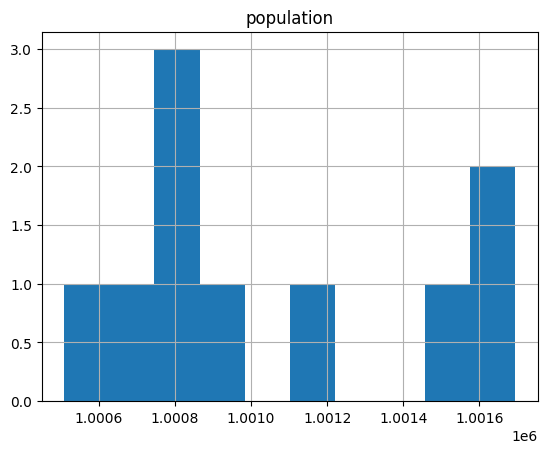

In [44]:
places.head(10).hist()
places.head(10)['city']

# Ejercicios de consultas

<div class="alert alert-warning" role="alert" style="margin: 10px">
La librería a veces tiene problemas con las fechas. Si es así, colocal la consulta en el endpoint directamente para comprobar que si el problema está en la consulta o en el paquete.
</div>

In [97]:
# Definimos los prefijos que representan las URIs de los recursos de dbpedia
prefixes=inline("""
    @prefix : <http://dbpedia.org/resource/> .
    @prefix dbo: <http://dbpedia.org/ontology/> .
    @prefix dbp: <http://dbpedia.org/property/> .
    @prefix foaf: <http://xmlns.com/foaf/0.1/> .
    @prefix dbr: <http://dbpedia.org/resource/>.
    @prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
""").graph

In [46]:
# Obtenemos el acceso a los datos de la base de datos de dbpedia mediante el protocolo SPARQL
endpoint=RemoteEndpoint(
    "http://dbpedia.org/sparql/"
    ,default_graph="http://dbpedia.org"
    ,prefixes=prefixes
    ,base_uri="http://dbpedia.org/resource/"
)

1. Obtener el tamaño de las ciudades más extensas de España


In [56]:
size_cities = endpoint.select("""
SELECT ?city ?area
WHERE {
  ?city rdf:type dbo:City .
  ?city dbo:country dbr:Spain .
  ?city dbo:areaTotal ?area 
}
ORDER BY DESC(?area)
LIMIT 10
""")

In [60]:
size_cities.head()

,city,area
0,<Albacete>,1125910000
1,<Zaragoza>,973780000
2,"<Cuenca,_Spain>",911060000
3,<Hornachuelos>,909220000
4,<Murcia>,881860000


2. Comunidad autónoma a la que pertenece cada ciudad

In [180]:
ccaa_city = endpoint.select("""
SELECT DISTINCT ?city_name ?region_name
WHERE {
  ?city rdf:type dbo:City ;
   dbo:country dbr:Spain ;
   rdfs:label ?city_name ;
   dbo:subdivision ?subdivision .
  ?subdivision dbo:type dbr:Autonomous_communities_of_Spain .
  ?subdivision rdfs:label ?region_name .
  FILTER (LANG(?city_name) = "es") 
  FILTER (LANG(?region_name) = "es")
} LIMIT 200
""")

In [181]:
ccaa_city

,city_name,region_name
0,Río Daroca,Aragon (Aude)
1,Daroca,Aragon (Aude)
2,Delicias (Zaragoza),Aragon (Aude)
3,Vigo,Galicia
4,Somozas (parroquia),Galicia
...,...,...
195,Cuenca (España),Castilla-La Mancha
196,Cuenca (distrito),Castilla-La Mancha
197,Puertollano,Castilla-La Mancha
198,Sigüenza,Castilla-La Mancha


3. Diferencia de altura mínima entre la ciudad más alta y más baja (con una altitud entre 100 y 789 msnm)

In [114]:
height_difference = endpoint.select("""
SELECT (MAX(?elevation) - MIN(?elevation) AS ?height_difference)
WHERE{
    
    ?city rdf:type dbo:City .
    ?city dbo:country dbr:Spain .
    ?city dbo:elevation ?elevation .
    FILTER(?elevation >= 100 && ?elevation<=789)
    
}
""")

print('Minimum height difference between the highest and the lowest city (with an altitude between 100 and 789) is', height_difference['height_difference'][0], 'meters over sea level')

Minimum height difference between the highest and the lowest city (with an altitude between 100 and 789) is 670 meters over sea level


4. Poblaciones de la CCAA de Cantabria 

In [109]:
villages_of_cantabria = endpoint.select("""
SELECT ?villages
WHERE{
?villages a dbo:PopulatedPlace .
?villages dbo:subdivision dbr:Cantabria .
}
""")

In [111]:
villages_of_cantabria.head()

,villages
0,<Ampuero>
1,<Val_de_San_Vicente>
2,<Valdeolea>
3,<Valdeprado_del_Río>
4,<Valderredible>


5. Obtener la población total de Londres 

In [105]:
london_population = endpoint.select("""
SELECT ?population
WHERE {
  dbr:London dbo:populationTotal ?population .
}
""")

print('There are', london_population['population'][0], 'citizens in London')

There are 9002488 citizens in London


6. Gente que nació en Londres antes de 1905 

In [118]:
# Problemas con la fecha
london_born_before_1905 = endpoint.select("""
SELECT DISTINCT ?person ?birthDate
WHERE {
    ?person dbo:birthPlace dbr:London .
    ?person dbo:birthDate ?birthDate .
    FILTER (year(?birthDate) < 1905)
}
ORDER BY DESC(?birthDate)
""")

7. Nombre y fechas de nacimiento y de muerte de toda la gente nacida en Londres entre 1910 y 1960. 

In [120]:
# Problemas con la fecha
london_bornAndDeath_btwn_1910_1960 = endpoint.select("""
SELECT DISTINCT ?person_name ?birth_date ?death_date
WHERE {
  ?person dbo:birthPlace dbr:London .
  ?person rdfs:label ?person_name .
  ?person dbo:birthDate ?birth_date .
  ?person dbo:deathDate ?death_date .
  FILTER (LANG(?person_name) = "en")
  FILTER (xsd:date(?birth_date) >= "1910-01-01"^^xsd:date && xsd:date(?birth_date) <= "1960-12-31"^^xsd:date)
} LIMIT 1000
""")

8. Nombre y fecha de nacimiento de los actores nacidos en Londres después de 1933 que siguen vivos.

In [132]:
# Problemas con la fecha
london_actors = endpoint.select("""
SELECT DISTINCT ?actor_name ?birth_date
WHERE {
  ?actor a dbo:Person ;
         dbo:birthPlace dbr:London ;
         dbo:birthDate ?birth_date ;
         dbo:occupation dbr:Actor ;
         foaf:name ?actor_name .
FILTER (LANG(?actor_name) = "en")
FILTER (?birth_date > "1933-01-01"^^xsd:date)
OPTIONAL{?actor dbo:deathDate ?death_date . }
FILTER (!bound(?death_date))
}
""")

9. Fotos de 10 de los actores nacidos en Londres después de 1933 que siguen vivos.

In [149]:
actors = endpoint.select("""
SELECT DISTINCT ?actor_name ?photo
WHERE {
  ?actor a dbo:Person ;
         dbo:birthPlace dbr:London ;
         dbo:birthDate ?birth_date ;
         dbo:occupation dbr:Actor ;
         foaf:name ?actor_name ;
         foaf:depiction ?photo .
FILTER (LANG(?actor_name) = "en")
FILTER (?birth_date > "1933-01-01"^^xsd:date)
OPTIONAL{?actor dbo:deathDate ?death_date . }
FILTER (!bound(?death_date))
}
""")
actors.head(10)

,actor_name,photo
0,Daniel Roche,http://commons.wikimedia.org/wiki/Special:FilePath/Daniel_Roche_2015.jpg
1,Danny Lee Wynter,http://commons.wikimedia.org/wiki/Special:FilePath/Danny_Lee_Wynter.jpg
2,David Wayman,http://commons.wikimedia.org/wiki/Special:FilePath/Davidwaymanraindancearrival.jpg
3,Ashley Chin,http://commons.wikimedia.org/wiki/Special:FilePath/AshleyChinOctober2019.png
4,Bel Powley,http://commons.wikimedia.org/wiki/Special:FilePath/Bel_Powley_at_Diary_of_a_Teenage_Girl_premier...
5,Bel Powley,"http://commons.wikimedia.org/wiki/Special:FilePath/Bel_Powley_by_Patrick_Lovell,_February_2020_(..."
6,Sanjeev Bhaskar,http://commons.wikimedia.org/wiki/Special:FilePath/Sanjeev_Bhaskar_Asian_Awards_2015.jpg
7,Tara Sharma,http://commons.wikimedia.org/wiki/Special:FilePath/Tara_promotes_'10ml_Love'.jpg
8,Emer Kenny,http://commons.wikimedia.org/wiki/Special:FilePath/Emer_Kenny.jpg
9,Marianne Jean-Baptiste,http://commons.wikimedia.org/wiki/Special:FilePath/Marianne_Jean_Baptiste_by_RealTVfilms.jpg


In [147]:
HTML('<img src="{0}">'.format(actors.at[3,'photo']))

10 . Diagrama de barras de las 10 peliculas más largas con un presupuesto mayor de 1M

In [178]:
longest_and_expensive_films = endpoint.select("""
SELECT ?film_name ?runtime ?budget
WHERE {
  ?film rdf:type dbo:Film ;
        rdfs:label ?film_name ;
        dbo:budget ?budget ;
        dbo:runtime ?runtime .
  FILTER (LANG(?film_name) = "en")
  FILTER (?budget > 1000000)
}
ORDER BY DESC(?runtime)
LIMIT 11

""")
longest_and_expensive_films.head()

,film_name,runtime,budget
0,Berlin Alexanderplatz (miniseries),55860,13000000.0
1,Berlin Alexanderplatz (miniseries),53640,13000000.0
2,Jaws (franchise),28680,80000000.0
3,O.J.: Made in America,28020,5000000.0
4,Kyaa Kool Hain Hum (film series),26040,50.0


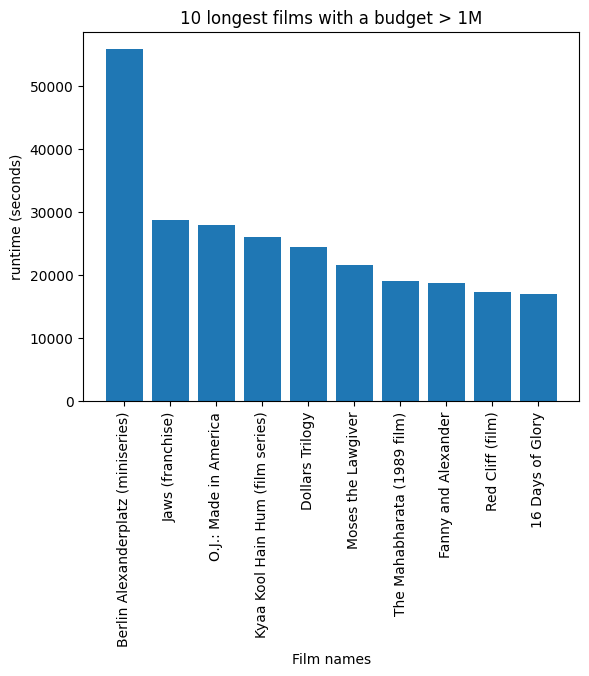

In [179]:
# Diagrama de barras
plt.bar(longest_and_expensive_films['film_name'], longest_and_expensive_films['runtime'])
plt.xlabel('Film names')
plt.ylabel('runtime (seconds)')
plt.title('10 longest films with a budget > 1M')
plt.xticks(rotation=90)
plt.show()